# Part 0 : Get Data, transform it and visualize it

In [460]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter

In [461]:
train_set = pd.read_csv("sign-language-mnist/sign_mnist_train.csv")
test_set = pd.read_csv("sign-language-mnist/sign_mnist_test.csv")

In [462]:
train_set.head(20)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [463]:
train_set.label = train_set.label.apply(lambda x : x-1 if x>=10 else x)
test_set.label = test_set.label.apply(lambda x : x-1 if x>=10 else x)

In [464]:
#Distribution of labels
counts = Counter(list(train_set["label"]))
counts

Counter({3: 1196,
         6: 1090,
         2: 1144,
         12: 1151,
         15: 1279,
         8: 1162,
         21: 1225,
         17: 1199,
         9: 1114,
         19: 1161,
         16: 1294,
         18: 1186,
         20: 1082,
         22: 1164,
         23: 1118,
         1: 1010,
         11: 1055,
         10: 1241,
         14: 1088,
         4: 957,
         0: 1126,
         5: 1204,
         7: 1013,
         13: 1196})

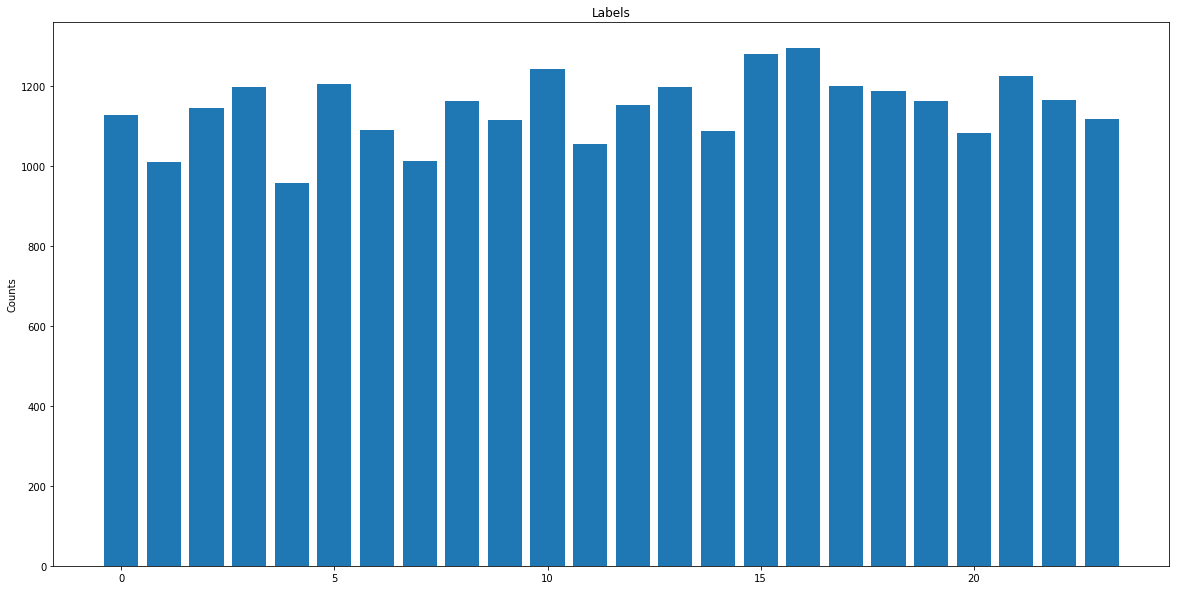

In [465]:
plt.subplots(figsize = (20,10))
plt.bar([k for k in counts.keys()], [k for k in counts.values()], align='center')
plt.ylabel('Counts')
plt.title('Labels')

plt.show()

# Part 1 : Prepare the data for training/testing the model (add class "point down")

In [466]:
NUMBER_OF_CLASSES = 25

In [467]:
def row_to_dict_image(row):
    label = row[1]["label"]
    img = np.zeros((28, 28))
    for i in range(0, 28):
        c = 28*i
        for j in range(0, 28):
            img[i, j] = row[1]["pixel{}".format(j+c+1)]
    return {"label" : label, "img" : img}

In [468]:
def row_to_image(row):
    img = np.zeros((28, 28))
    for i in range(0, 28):
        c = 28*i
        for j in range(0, 28):
            pixel = row[1]["pixel{}".format(j+c+1)]
            img[i, j] = pixel/255
    img = img.reshape((28, 28, 1))
    return img

def row_to_label(row):
    return row[1]["label"]

In [469]:
X_Train = [row_to_image(row) for row in train_set.iterrows()]
#X_Train.extend([np.rot90(row_to_image(row), 2) for row in train_set.iterrows() if row[1]["label"] == 3])

Y_Train = [[1 if i==row_to_label(row) else 0 for i in range(NUMBER_OF_CLASSES)] for row in train_set.iterrows()]
#Y_Train.extend([[1 if i==NUMBER_OF_CLASSES-1 else 0 for i in range(NUMBER_OF_CLASSES)] for row in train_set.iterrows() if row[1]["label"] == 3])

X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

In [470]:
X_Test = [row_to_image(row) for row in test_set.iterrows()]
#X_Test.extend([np.rot90(row_to_image(row), 2) for row in test_set.iterrows() if row[1]["label"] == 3])

Y_Test = [[1 if i==row_to_label(row) else 0 for i in range(NUMBER_OF_CLASSES+1)] for row in test_set.iterrows()]
#Y_Test.extend([[1 if i==NUMBER_OF_CLASSES else 0 for i in range(NUMBER_OF_CLASSES+1)] for row in test_set.iterrows() if row[1]["label"] == 3])

X_Test = np.array(X_Test)
Y_Test = np.array(Y_Test)

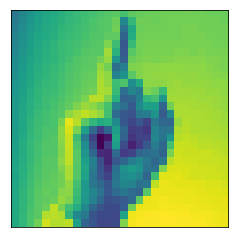

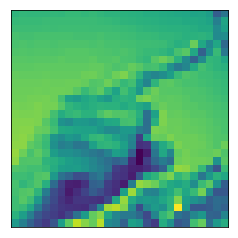

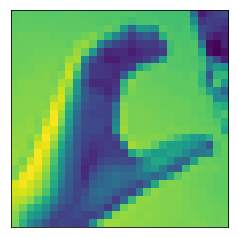

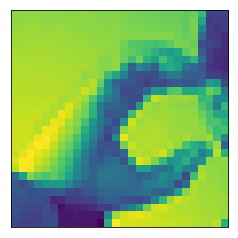

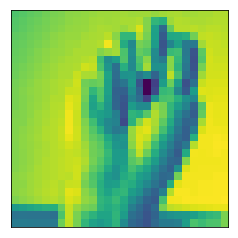

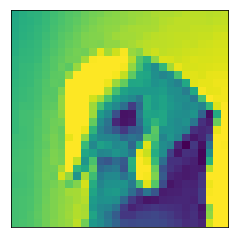

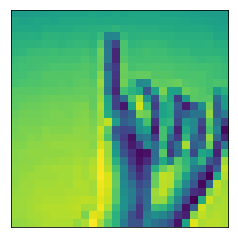

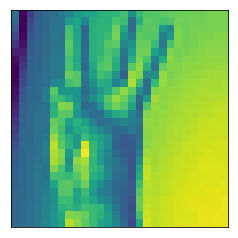

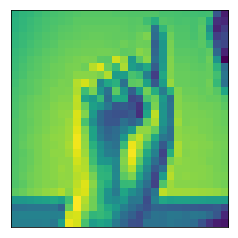

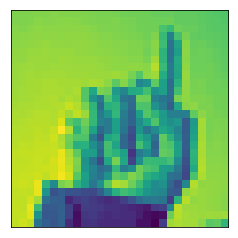

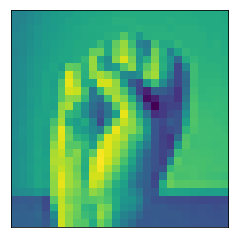

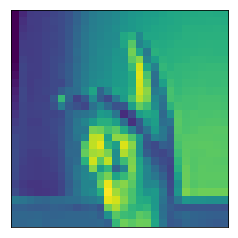

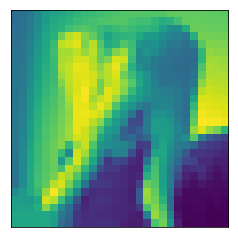

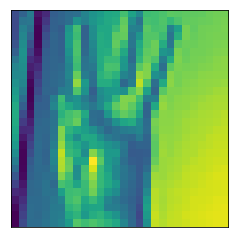

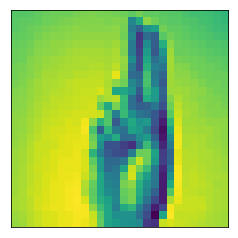

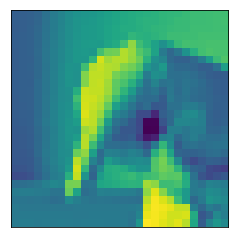

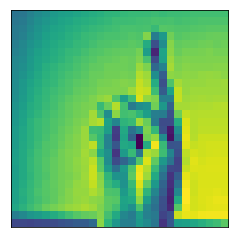

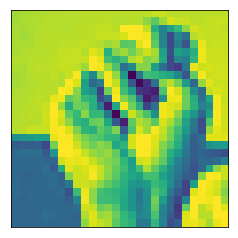

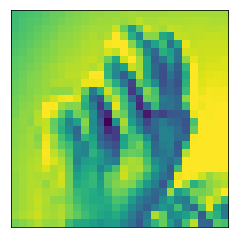

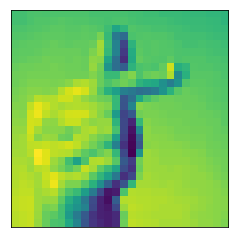

In [471]:
for i in range(20):
    plt.imshow(X_Train[i,:].reshape((28, 28))*255)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [472]:
len(Y_Train)

28651

In [473]:
Y_Train[-1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1])

# Part 2 : Training 

In [474]:
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.callbacks import EarlyStopping

In [475]:
def HandModel(input_shape):
    
    X_input = Input(input_shape, name = "input_layer")

    # Zero-Padding
    X = ZeroPadding2D((2, 2), name = "zeropadding_1")(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(6, (5, 5), strides = (1, 1), name = 'conv1')(X)
    X = Activation('relu', name = "relu_1")(X)

    # AVERAGEPOOL
    X = AveragePooling2D(pool_size = (2, 2), name='average_pool1')(X)
    
    # Zero-Padding
    X = ZeroPadding2D((2, 2), name = "zeropadding_2")(X)
    
    # CONV -> RELU Block applied to X
    X = Conv2D(16, (5, 5), strides = (1, 1), name = 'conv2')(X)
    X = Activation('relu', name = "relu_2")(X)

    # AVERAGEPOOL
    X = AveragePooling2D(pool_size = (2, 2), strides = (2, 2), name='average_pool2')(X)

    # FLATTEN X + FULLYCONNECTED
    X = Flatten(name='flatten_1')(X)
    X = Dense(120, activation='relu', name='dense_1')(X)
    
    #DROPOUT
    #X = Dropout(0.1, name = "dropout_1")(X)
    
    # FULLYCONNECTED
    X = Dense(84, activation='relu', name='dense_2')(X)
    
    # FULLYCONNECTED (SOFTMAX)
    X = Dense(NUMBER_OF_CLASSES, activation='softmax', name='output_layer')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HandModel')

    return model

In [476]:
X_Train.shape[1:]

(28, 28, 1)

In [477]:
model = HandModel(X_Train.shape[1:])

In [478]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     (None, 28, 28, 1)         0         
_________________________________________________________________
zeropadding_1 (ZeroPadding2D (None, 32, 32, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 6)         156       
_________________________________________________________________
relu_1 (Activation)          (None, 28, 28, 6)         0         
_________________________________________________________________
average_pool1 (AveragePoolin (None, 14, 14, 6)         0         
_________________________________________________________________
zeropadding_2 (ZeroPadding2D (None, 18, 18, 6)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 16)        2416      
__________

In [479]:
model.compile("Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [480]:
EPOCHS = 100

In [481]:
early_stopping_callback = EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None)
history = model.fit(x = X_Train, y = Y_Train, validation_split=0.20, batch_size=256, epochs = EPOCHS, callbacks=[early_stopping_callback])

Train on 25785 samples, validate on 2866 samples
Epoch 1/100
25785/25785 [==============================] - 24s 936us/step - loss: 2.4802 - acc: 0.2539 - val_loss: 6.0017 - val_acc: 0.3025
Epoch 2/100
25785/25785 [==============================] - 21s 831us/step - loss: 1.2629 - acc: 0.6019 - val_loss: 6.8794 - val_acc: 0.3911
Epoch 3/100
25785/25785 [==============================] - 19s 752us/step - loss: 0.7703 - acc: 0.7542 - val_loss: 6.8537 - val_acc: 0.4689
Epoch 4/100
25785/25785 [==============================] - 24s 928us/step - loss: 0.4947 - acc: 0.8410 - val_loss: 6.8622 - val_acc: 0.5049
Epoch 5/100
25785/25785 [==============================] - 25s 957us/step - loss: 0.3264 - acc: 0.8995 - val_loss: 6.8344 - val_acc: 0.5380
Epoch 6/100
25785/25785 [==============================] - 21s 804us/step - loss: 0.2177 - acc: 0.9367 - val_loss: 6.8192 - val_acc: 0.5523
Epoch 7/100
25785/25785 [==============================] - 20s 795us/step - loss: 0.1373 - acc: 0.9642 - val_lo

In [482]:
with open('handmodel_architecture.json', 'w') as f:
    f.write(model.to_json())
model.save_weights('handmodel_weights.hdf5')

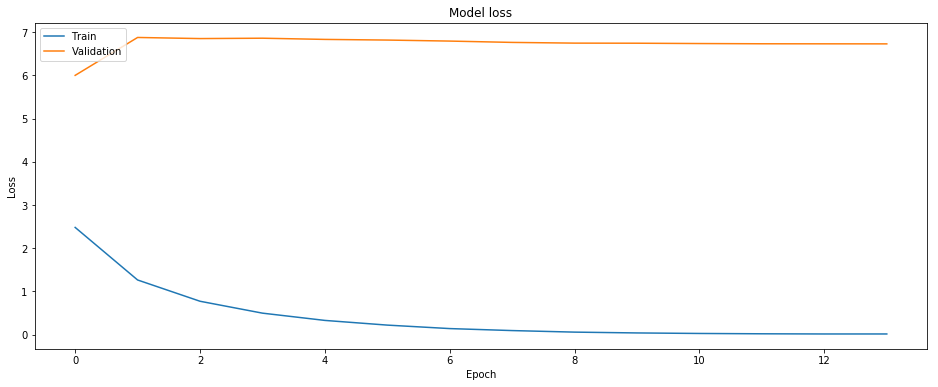

In [503]:
plt.figure(figsize=(16, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Part 3 : Testing

In [540]:
from sklearn.metrics import confusion_matrix

In [541]:
preds = model.predict(X_Test)

In [542]:
preds = (preds > 0.5).astype(int)
for predicted, real in zip(preds, Y_Test):
    ip = np.where(predicted == 1)
    ir = np.where(real == 1)
    print("Predicted : {}, Real : {} ".format(ip[0], ir[0]))

Predicted : [6], Real : [6] 
Predicted : [5], Real : [5] 
Predicted : [9], Real : [9] 
Predicted : [0], Real : [0] 
Predicted : [3], Real : [3] 
Predicted : [3], Real : [20] 
Predicted : [9], Real : [9] 
Predicted : [13], Real : [13] 
Predicted : [3], Real : [3] 
Predicted : [7], Real : [7] 
Predicted : [8], Real : [8] 
Predicted : [8], Real : [8] 
Predicted : [20], Real : [20] 
Predicted : [11], Real : [11] 
Predicted : [7], Real : [7] 
Predicted : [4], Real : [4] 
Predicted : [21], Real : [21] 
Predicted : [0], Real : [0] 
Predicted : [7], Real : [7] 
Predicted : [7], Real : [7] 
Predicted : [2], Real : [2] 
Predicted : [0], Real : [0] 
Predicted : [20], Real : [20] 
Predicted : [4], Real : [4] 
Predicted : [9], Real : [9] 
Predicted : [14], Real : [14] 
Predicted : [2], Real : [2] 
Predicted : [14], Real : [14] 
Predicted : [7], Real : [7] 
Predicted : [1], Real : [1] 
Predicted : [7], Real : [7] 
Predicted : [8], Real : [8] 
Predicted : [12], Real : [12] 
Predicted : [18], Real : [

Predicted : [3], Real : [3] 
Predicted : [11], Real : [11] 
Predicted : [8], Real : [8] 
Predicted : [23], Real : [23] 
Predicted : [23], Real : [23] 
Predicted : [19], Real : [9] 
Predicted : [12], Real : [12] 
Predicted : [4], Real : [4] 
Predicted : [1], Real : [1] 
Predicted : [7], Real : [7] 
Predicted : [18], Real : [6] 
Predicted : [18], Real : [18] 
Predicted : [18], Real : [13] 
Predicted : [22], Real : [10] 
Predicted : [20], Real : [20] 
Predicted : [0], Real : [0] 
Predicted : [23], Real : [23] 
Predicted : [15], Real : [15] 
Predicted : [7], Real : [7] 
Predicted : [8], Real : [8] 
Predicted : [8], Real : [8] 
Predicted : [10], Real : [10] 
Predicted : [1], Real : [1] 
Predicted : [4], Real : [4] 
Predicted : [19], Real : [19] 
Predicted : [7], Real : [7] 
Predicted : [10], Real : [10] 
Predicted : [3], Real : [3] 
Predicted : [4], Real : [4] 
Predicted : [21], Real : [9] 
Predicted : [20], Real : [20] 
Predicted : [0], Real : [0] 
Predicted : [8], Real : [8] 
Predicted : 

Predicted : [23], Real : [23] 
Predicted : [7], Real : [7] 
Predicted : [21], Real : [21] 
Predicted : [8], Real : [8] 
Predicted : [21], Real : [21] 
Predicted : [5], Real : [5] 
Predicted : [5], Real : [9] 
Predicted : [19], Real : [9] 
Predicted : [5], Real : [5] 
Predicted : [7], Real : [7] 
Predicted : [0], Real : [0] 
Predicted : [1], Real : [1] 
Predicted : [1], Real : [1] 
Predicted : [21], Real : [21] 
Predicted : [12], Real : [11] 
Predicted : [8], Real : [8] 
Predicted : [21], Real : [21] 
Predicted : [12], Real : [12] 
Predicted : [15], Real : [6] 
Predicted : [5], Real : [5] 
Predicted : [21], Real : [20] 
Predicted : [7], Real : [7] 
Predicted : [2], Real : [2] 
Predicted : [22], Real : [22] 
Predicted : [20], Real : [20] 
Predicted : [7], Real : [7] 
Predicted : [13], Real : [13] 
Predicted : [22], Real : [22] 
Predicted : [7], Real : [7] 
Predicted : [14], Real : [14] 
Predicted : [7], Real : [7] 
Predicted : [12], Real : [12] 
Predicted : [1], Real : [1] 
Predicted : [

Predicted : [6], Real : [6] 
Predicted : [0], Real : [0] 
Predicted : [14], Real : [14] 
Predicted : [4], Real : [4] 
Predicted : [2], Real : [2] 
Predicted : [7], Real : [7] 
Predicted : [22], Real : [22] 
Predicted : [4], Real : [4] 
Predicted : [8], Real : [8] 
Predicted : [3], Real : [3] 
Predicted : [21], Real : [21] 
Predicted : [22], Real : [18] 
Predicted : [23], Real : [23] 
Predicted : [8], Real : [8] 
Predicted : [20], Real : [16] 
Predicted : [8], Real : [8] 
Predicted : [15], Real : [12] 
Predicted : [7], Real : [7] 
Predicted : [3], Real : [3] 
Predicted : [4], Real : [4] 
Predicted : [7], Real : [7] 
Predicted : [23], Real : [23] 
Predicted : [10], Real : [10] 
Predicted : [22], Real : [22] 
Predicted : [13], Real : [13] 
Predicted : [0], Real : [0] 
Predicted : [12], Real : [12] 
Predicted : [14], Real : [14] 
Predicted : [23], Real : [23] 
Predicted : [5], Real : [2] 
Predicted : [11], Real : [11] 
Predicted : [8], Real : [8] 
Predicted : [19], Real : [19] 
Predicted :

Predicted : [7], Real : [7] 
Predicted : [0], Real : [12] 
Predicted : [19], Real : [19] 
Predicted : [21], Real : [9] 
Predicted : [22], Real : [22] 
Predicted : [11], Real : [11] 
Predicted : [1], Real : [1] 
Predicted : [15], Real : [15] 
Predicted : [4], Real : [17] 
Predicted : [20], Real : [20] 
Predicted : [8], Real : [8] 
Predicted : [23], Real : [23] 
Predicted : [9], Real : [23] 
Predicted : [9], Real : [9] 
Predicted : [8], Real : [8] 
Predicted : [14], Real : [14] 
Predicted : [1], Real : [1] 
Predicted : [5], Real : [5] 
Predicted : [16], Real : [16] 
Predicted : [12], Real : [12] 
Predicted : [23], Real : [23] 
Predicted : [8], Real : [8] 
Predicted : [8], Real : [8] 
Predicted : [5], Real : [5] 
Predicted : [16], Real : [16] 
Predicted : [22], Real : [22] 
Predicted : [18], Real : [13] 
Predicted : [3], Real : [3] 
Predicted : [3], Real : [19] 
Predicted : [19], Real : [19] 
Predicted : [1], Real : [1] 
Predicted : [7], Real : [7] 
Predicted : [7], Real : [7] 
Predicted 

Predicted : [9], Real : [9] 
Predicted : [0], Real : [0] 
Predicted : [16], Real : [16] 
Predicted : [14], Real : [14] 
Predicted : [17], Real : [17] 
Predicted : [4], Real : [4] 
Predicted : [2], Real : [2] 
Predicted : [21], Real : [20] 
Predicted : [6], Real : [6] 
Predicted : [20], Real : [20] 
Predicted : [6], Real : [6] 
Predicted : [17], Real : [17] 
Predicted : [7], Real : [7] 
Predicted : [6], Real : [6] 
Predicted : [3], Real : [3] 
Predicted : [1], Real : [1] 
Predicted : [9], Real : [9] 
Predicted : [5], Real : [5] 
Predicted : [11], Real : [11] 
Predicted : [4], Real : [4] 
Predicted : [4], Real : [4] 
Predicted : [0], Real : [12] 
Predicted : [22], Real : [22] 
Predicted : [9], Real : [20] 
Predicted : [14], Real : [14] 
Predicted : [4], Real : [4] 
Predicted : [7], Real : [7] 
Predicted : [0], Real : [0] 
Predicted : [18], Real : [18] 
Predicted : [16], Real : [16] 
Predicted : [5], Real : [5] 
Predicted : [11], Real : [11] 
Predicted : [5], Real : [5] 
Predicted : [2], 

Predicted : [12], Real : [11] 
Predicted : [10], Real : [23] 
Predicted : [2], Real : [2] 
Predicted : [7], Real : [7] 
Predicted : [20], Real : [20] 
Predicted : [14], Real : [14] 
Predicted : [7], Real : [7] 
Predicted : [], Real : [12] 
Predicted : [11], Real : [11] 
Predicted : [10], Real : [23] 
Predicted : [7], Real : [7] 
Predicted : [23], Real : [23] 
Predicted : [21], Real : [9] 
Predicted : [20], Real : [20] 
Predicted : [22], Real : [22] 
Predicted : [15], Real : [15] 
Predicted : [0], Real : [0] 
Predicted : [], Real : [9] 
Predicted : [2], Real : [2] 
Predicted : [5], Real : [2] 
Predicted : [7], Real : [7] 
Predicted : [12], Real : [12] 
Predicted : [20], Real : [20] 
Predicted : [4], Real : [17] 
Predicted : [14], Real : [14] 
Predicted : [3], Real : [3] 
Predicted : [8], Real : [17] 
Predicted : [3], Real : [3] 
Predicted : [4], Real : [4] 
Predicted : [17], Real : [17] 
Predicted : [14], Real : [14] 
Predicted : [2], Real : [2] 
Predicted : [9], Real : [9] 
Predicted :

Predicted : [1], Real : [1] 
Predicted : [4], Real : [11] 
Predicted : [1], Real : [1] 
Predicted : [17], Real : [17] 
Predicted : [9], Real : [9] 
Predicted : [23], Real : [23] 
Predicted : [0], Real : [0] 
Predicted : [4], Real : [4] 
Predicted : [12], Real : [12] 
Predicted : [9], Real : [9] 
Predicted : [20], Real : [20] 
Predicted : [23], Real : [23] 
Predicted : [14], Real : [14] 
Predicted : [20], Real : [20] 
Predicted : [20], Real : [20] 
Predicted : [21], Real : [21] 
Predicted : [3], Real : [19] 
Predicted : [8], Real : [8] 
Predicted : [8], Real : [8] 
Predicted : [9], Real : [9] 
Predicted : [15], Real : [13] 
Predicted : [8], Real : [8] 
Predicted : [16], Real : [19] 
Predicted : [14], Real : [14] 
Predicted : [4], Real : [4] 
Predicted : [6], Real : [6] 
Predicted : [18], Real : [18] 
Predicted : [23], Real : [23] 
Predicted : [21], Real : [21] 
Predicted : [11], Real : [11] 
Predicted : [11], Real : [11] 
Predicted : [20], Real : [20] 
Predicted : [13], Real : [13] 
Pre

In [543]:
y_preds = [l.index(1) if 1 in l else 0 for l in preds.tolist()]

In [544]:
y_true = [l.index(1) for l in Y_Test.tolist()]

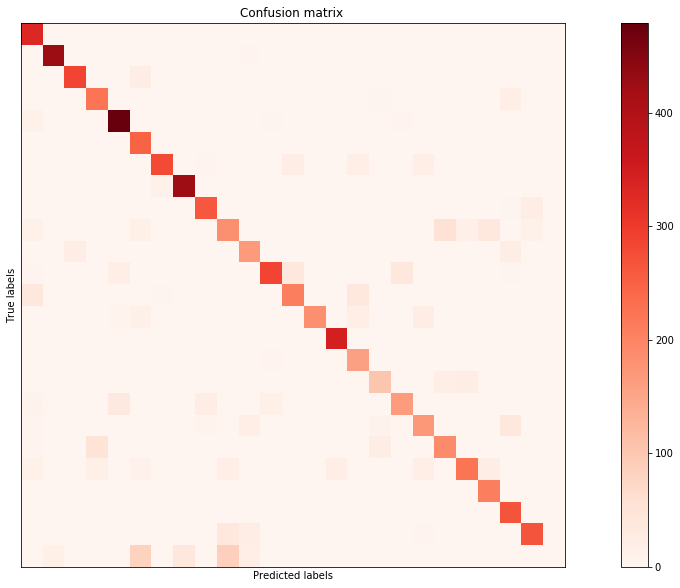

In [545]:
cm = confusion_matrix(y_true, y_preds)

plt.subplots(figsize=(20, 10))
plt.imshow(cm, cmap=plt.cm.Reds)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

# Test with own image

In [490]:
import cv2

In [529]:
test = cv2.imread("right.jpg", 0)

In [530]:
test

array([[187, 185, 187, ..., 198, 198, 197],
       [189, 187, 187, ..., 198, 199, 200],
       [191, 190, 190, ..., 199, 199, 200],
       ...,
       [170, 170, 168, ..., 167, 168, 169],
       [169, 169, 168, ..., 166, 167, 167],
       [169, 169, 168, ..., 165, 168, 167]], dtype=uint8)

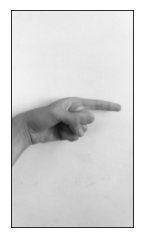

In [531]:
plt.imshow(test, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

In [532]:
test = cv2.resize(test, (28, 28))

In [533]:
test

array([[191, 189, 188, 189, 186, 186, 187, 182, 186, 188, 186, 186, 184,
        187, 187, 186, 185, 185, 188, 187, 187, 185, 191, 190, 192, 193,
        192, 197],
       [190, 186, 188, 185, 185, 187, 186, 185, 184, 184, 187, 187, 181,
        184, 187, 187, 187, 186, 186, 186, 189, 186, 187, 189, 188, 189,
        193, 194],
       [188, 191, 189, 188, 187, 188, 182, 185, 188, 185, 190, 183, 185,
        186, 185, 182, 188, 187, 189, 187, 187, 186, 190, 186, 190, 190,
        193, 188],
       [189, 190, 188, 190, 187, 185, 186, 192, 187, 187, 185, 187, 189,
        186, 186, 183, 186, 187, 187, 188, 185, 184, 186, 185, 188, 184,
        189, 187],
       [188, 188, 192, 188, 186, 189, 189, 185, 183, 184, 182, 183, 189,
        187, 184, 187, 184, 184, 185, 186, 185, 187, 183, 187, 188, 190,
        189, 188],
       [191, 190, 186, 185, 189, 186, 185, 187, 184, 186, 184, 185, 182,
        184, 185, 186, 186, 185, 183, 185, 182, 185, 187, 188, 183, 190,
        189, 190],
       [18

In [534]:
test = test.reshape((1, 28, 28, 1))

In [535]:
test = test/255

In [536]:
test

array([[[[0.74901961],
         [0.74117647],
         [0.7372549 ],
         [0.74117647],
         [0.72941176],
         [0.72941176],
         [0.73333333],
         [0.71372549],
         [0.72941176],
         [0.7372549 ],
         [0.72941176],
         [0.72941176],
         [0.72156863],
         [0.73333333],
         [0.73333333],
         [0.72941176],
         [0.7254902 ],
         [0.7254902 ],
         [0.7372549 ],
         [0.73333333],
         [0.73333333],
         [0.7254902 ],
         [0.74901961],
         [0.74509804],
         [0.75294118],
         [0.75686275],
         [0.75294118],
         [0.77254902]],

        [[0.74509804],
         [0.72941176],
         [0.7372549 ],
         [0.7254902 ],
         [0.7254902 ],
         [0.73333333],
         [0.72941176],
         [0.7254902 ],
         [0.72156863],
         [0.72156863],
         [0.73333333],
         [0.73333333],
         [0.70980392],
         [0.72156863],
         [0.73333333],
         

In [537]:
preds = model.predict(test)

In [538]:
preds = (preds > 0.5).astype(int)

In [539]:
preds

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0]])